Processing image: C:\Users\luxsh\Desktop\Image_Processing\seminal-interview\Question_1\test_images\001.jpg


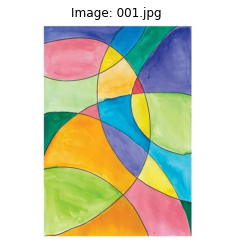

Color percentages in the image:
Red: 0.34%
White: 40.39%
Black: 2.46%
Blue: 19.31%
Yellow: 37.36%
Green: 0.14%


Processing image: C:\Users\luxsh\Desktop\Image_Processing\seminal-interview\Question_1\test_images\002.jpg


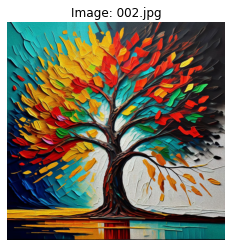

Color percentages in the image:
Red: 13.65%
White: 10.75%
Black: 42.95%
Blue: 18.85%
Yellow: 13.16%
Green: 0.65%


Processing image: C:\Users\luxsh\Desktop\Image_Processing\seminal-interview\Question_1\test_images\003.jpg


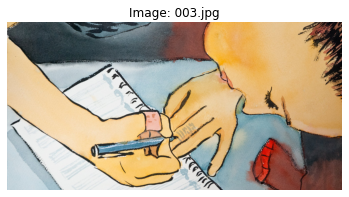

Color percentages in the image:
Red: 3.59%
White: 29.40%
Black: 21.31%
Blue: 11.42%
Yellow: 34.28%
Green: 0.00%


Processing image: C:\Users\luxsh\Desktop\Image_Processing\seminal-interview\Question_1\test_images\004.jpg


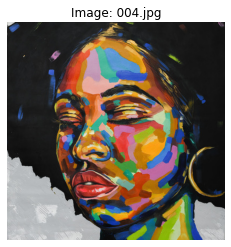

Color percentages in the image:
Red: 9.57%
White: 13.74%
Black: 53.62%
Blue: 9.51%
Yellow: 12.58%
Green: 0.99%


Processing image: C:\Users\luxsh\Desktop\Image_Processing\seminal-interview\Question_1\test_images\005.jpg


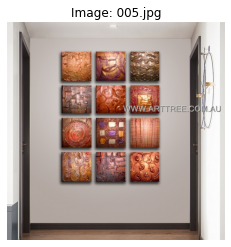

Color percentages in the image:
Red: 6.29%
White: 45.92%
Black: 18.77%
Blue: 7.14%
Yellow: 21.89%
Green: 0.00%


Processing image: C:\Users\luxsh\Desktop\Image_Processing\seminal-interview\Question_1\test_images\006.jpg


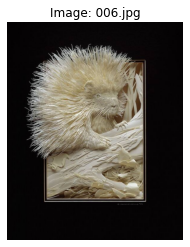

Color percentages in the image:
Red: 0.00%
White: 7.17%
Black: 66.29%
Blue: 6.01%
Yellow: 20.52%
Green: 0.00%




In [20]:
# Import necessary libraries
import json
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

def load_palette(palette_path):
    with open(palette_path, 'r') as file:
        palette_data = json.load(file)
    
    palette = {}  # Convert the palette data to a dictionary of color names to RGB values
    for item in palette_data['colour_palette']:
        color_name = item['Colour']
        rgb_value = [int(x) for x in item['RGBValue'].split(',')]
        palette[color_name] = rgb_value
    return palette


def closest_color(pixel, palette): # Find the closest color from the palette
    pixel = np.array(pixel)
    color_names = []
    color_values = []

    for color_name, color_value in palette.items():
        color_names.append(color_name)
        color_values.append(color_value)

    color_values = np.array(color_values)
    distances = np.linalg.norm(color_values - pixel, axis=1)
    closest_index = np.argmin(distances)
    return color_names[closest_index]


def process_image(image_path, palette): #  Processing a single image
    # Load image
    img = cv.imread(image_path)

    if img is None:
        raise ValueError(f"Error: Unable to load image at {image_path}")

    rows, columns, _ = img.shape
    
    color_count = {color_name: 0 for color_name in palette}

    for i in range(rows):
        for j in range(columns):
            pixel = img[i, j]
            pixel_rgb = [pixel[2], pixel[1], pixel[0]]  # Convert to RGB color format
            closest_match = closest_color(pixel_rgb, palette)
            color_count[closest_match] += 1

    total_pixels = rows * columns  # Calculate the percentage of each color
    color_percentage = {color: (count / total_pixels) * 100 for color, count in color_count.items()}
    
    return color_percentage

def process_all_images(folder_path, palette_path):
    palette = load_palette(palette_path)
    
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_files = [f for f in files if f.lower().endswith(('.jpg', '.png'))]
    results = {}  # Dictionary to store results for each image
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        print(f"Processing image: {image_path}")
        color_percentage = process_image(image_path, palette)
        
        results[image_file] = color_percentage
        
        # Display the image
        img = cv.imread(image_path)
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f'Image: {image_file}')
        plt.axis('off')
        plt.show()
        
        # Print the color percentages
        print("Color percentages in the image:")
        for color, percentage in color_percentage.items():
            print(f"{color}: {percentage:.2f}%")
        print("\n")

    return results


folder_path = 'C:\\Users\\luxsh\\Desktop\\Image_Processing\\seminal-interview\\Question_1\\test_images'
palette_path = 'C:\\Users\\luxsh\\Desktop\\Image_Processing\\seminal-interview\\Question_1\\colour_palette.json'  
results = process_all_images(folder_path, palette_path) # Process all images in the folder
